In [5]:

##########################################################################################################
# NOTE: This section imports all the library packages required by the assignment questions 
# Before executing any part, please run this section otherwise there will be errors
#######################################################################################################

# opencv is pre-installed in google colab
import cv2
# to check whether CV installed or not, just check its version
cv2.__version__

import numpy as np
from google.colab.patches import cv2_imshow 


from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import numpy as np
import cv2
import glob
from sklearn import metrics
from sklearn.neural_network import MLPClassifier # import Multilayer Perceptron classifier
from sklearn.naive_bayes import GaussianNB # import Naive Bayes classifier
from sklearn.svm import SVC,LinearSVC # import Support Vector Machine classifier
from tqdm import tqdm
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import random


from google.colab import drive 
drive.mount('/content/drive')

Your_google_drive_path = '/content/drive/MyDrive/sem6/mlscv/casestudy2/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-0.05522139356920072
50.01288432717072


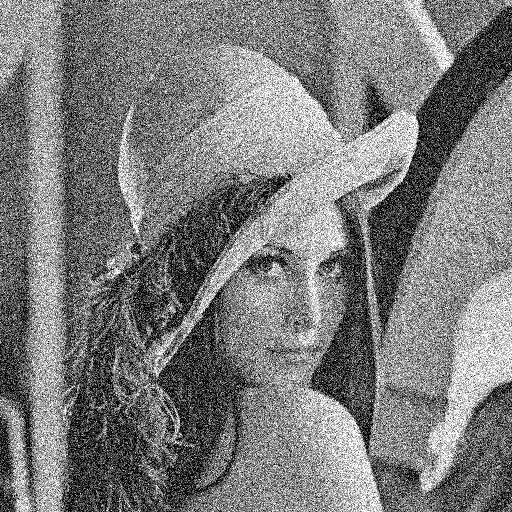

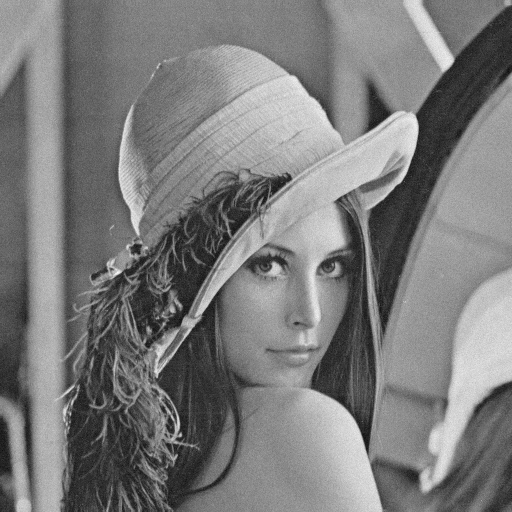

In [6]:
# Q1. Create a noisy image by adding a random noise to the original image 'originallenna.jpg'. 
# Disply the noisy image. Now add multiple noisy images to obtain a clean image.
# Display the clean image.

# You have to fill the gap in the code to compute 'img_noisy_sum'. 'img_noisy_sum' is the variable for
# obtaining the sum of all the noisy images 

# Brifly describe the process of obtaining the clean image and the idea behind the process ((Not more than 3 sentences))

# 2M for filling the code and 1 M for explanation

imgpath = Your_google_drive_path + 'originallenna.jpg' 
img = cv2.imread(imgpath, 0)



# Generate a random noise matrix (same size as image)
noise_matrix =  50*np.random.randn(img.shape[0], img.shape[1])
print(np.average(noise_matrix)) 
print(np.std(noise_matrix))

# show a noisy image
img_noisy = img+noise_matrix
cv2_imshow(img_noisy)

# Cleaning the image using image  avaraging of mutiple images of same sceen with different
# random noise value

No_of_iamges = 100
img_noisy_sum = img_noisy
for i in range(No_of_iamges):
    noise_matrix =  50*np.random.randn(img.shape[0], img.shape[1])
    img_noisy_curr = img + noise_matrix
    # Add your code here to calculate img_noisy_sum
    # img_noisy_sum = ____________________________
    img_noisy_sum = img_noisy_sum + img_noisy_curr
    


img_noisy_average = img_noisy_sum/(No_of_iamges+1)
cv2_imshow(img_noisy_average)


# Explanation of Question 1

Since we are using *numpy.random.randn()* to create noise matrices, which generate arrays of specified shapes and fill them with random values as per the standard normal distribution or univariate Gaussian distribution. 
As we know that the standard normal distribution is a normal distribution with mean μ = 0 and standard deviation σ = 1. By taking the average of all the noise matrices, we are calculating the mean of the standard normal distribution, which is zero. Hence on calculating the average, all the noises become zero and we got a clean image.

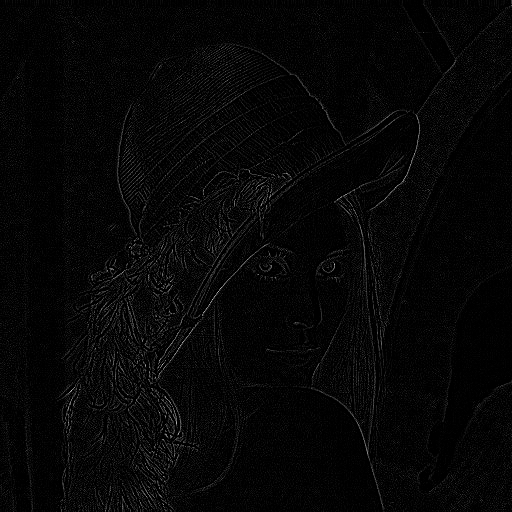

In [7]:
# Q2. Resize the input image to 256x256 using nearest neighbour interpolation
# and obtain the laplacian of the image 'originallenna.jpg' and display the image
# Describe in two sentences what you observe in the laplacian image
# Hint: Use the function cv2.filter2D and the kernel (laplacian) to obtain the laplacian of the image 

# Briefly explain the spatial filtering process (Not more than 3 sentences)
# 1 M for filling the space and 1 M for explanation

# reading images
imgpath = Your_google_drive_path + 'originallenna.jpg' 
img = cv2.imread(imgpath, 0)

# Use the function cv2.resize
img_resize = cv2.resize(img, (256, 256), interpolation = cv2.INTER_NEAREST)

# following is the kernel to be applied
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

# Use the function cv2.filter2D()

# img_laplacian = ________________________
img_laplacian = cv2.filter2D(img, -1, laplacian)


# display the image
cv2_imshow(img_laplacian)

# Explanation of Question 2

After applying laplacian kernel, we can see the edges of the image. In this question we have used  a positive laplacian operator, which is used to take out outward edges in an image.

**Spatial Filtering Process** : Spatial filtering term is the filtering operations that are performed directly on the pixels of an image. The process consists simply of moving the filter mask from point to point in an image. At each point (x,y) the response of the filter at that point is calculated using a predefined relationship, like laplace operator in our case.


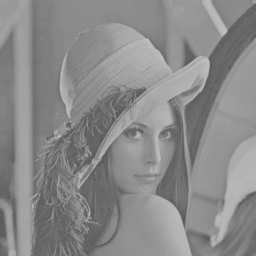

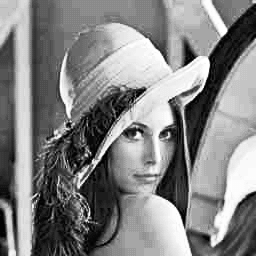

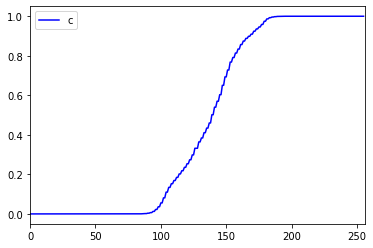

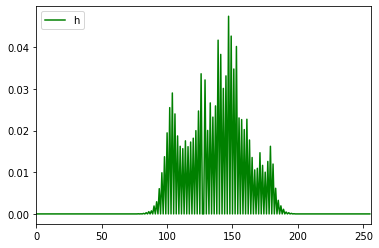

257
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


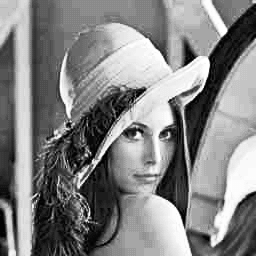

In [8]:
# Q3 Obtain the histogram equalization of the low contrast image 'lowContrast.png'.
# a) Use cv2.equalizeHist function to obtain the histogram equalized function. 
# Display the image before and after the equalization
# b) You have to fill the code in appropriate places for the histogram equalization. Display the image after equalization.

# Briefly explain the idea behind the histogram equalization (Not more than 3 sentences)
#  3 M for fill in the gap + 1 M for explanation

# cv2.equalizeHist 
imgpath = Your_google_drive_path + 'Low_contrast_lena.png' 
img_lowcontrast = cv2.imread(imgpath, 0)


# a) solution
cv2_imshow(img_lowcontrast)

# use the function cv2.equalizeHist to obtain the histogram equalization
# high_contrast_image_CV = _______________________
high_contrast_image_CV = cv2.equalizeHist(img_lowcontrast)



# display high contrast image
cv2_imshow(high_contrast_image_CV)



# b) 

hist,bins = np.histogram(img_lowcontrast.flatten(),256,[0,256])
bins = bins.astype(int)
hist = hist/hist.sum()
cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.figure()
plt.plot(cdf, color = 'b')
plt.xlim([0,256])
plt.legend(('cdf'), loc = 'upper left')
plt.show()

plt.figure()
plt.plot(hist, color = 'g')
# plt.hist(img_lowcontrast.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

# Need to obtain the histogram equalized bins
print(bins.shape[0])


newbins = bins + bins
for m in range(bins.shape[0]-1):
  print(m)
  # newbins[m] = ____________________________
  newbins[m] = np.round(cdf[m]*255) 

new_image = img_lowcontrast + img_lowcontrast
# Map each image pixel to the new image
for i in range(img_lowcontrast.shape[0]):
  for j in range(img_lowcontrast.shape[1]):
    img_lowcontrast_level = img_lowcontrast[i, j] 
    img_lowcontrast_level= img_lowcontrast_level.astype(int)
    # Hint use the newbins variable to obtain the new_image
    # new_image[i, j]= ___________________________________
    new_image[i, j]= newbins[img_lowcontrast_level]

cv2_imshow(new_image)



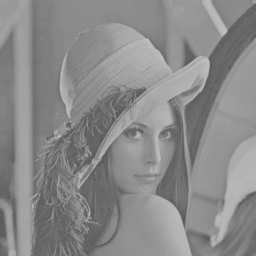

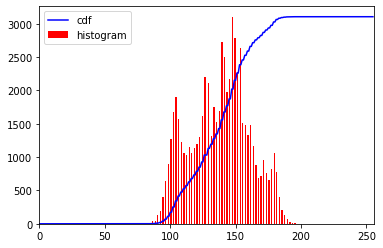

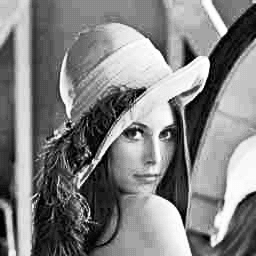

In [9]:
# Alternate way of doing question 3 b, using numpy masked array concept to distribute the bins on a wide range of frequencies of image pixels.

imgpath = Your_google_drive_path + 'Low_contrast_lena.png' 
img_lowcontrast = cv2.imread(imgpath, 0)

cv2_imshow(img_lowcontrast)

hist,bins = np.histogram(img_lowcontrast.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_lowcontrast.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


new_img = cdf[img_lowcontrast]

cv2_imshow(new_img)

# Explanation of Question 3
Histogram Equalization accomplishes to improves contrast in images by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This allows for areas of lower local contrast to gain a higher contrast.

Histogram equalization modifies the distribution of pixel intensities to achieve these characteristics:

*   the pixel intensities are uniformly distributed across the full range of values (each intensity value is equally probable), and
*   the cumulative histogram is increasing linearly across the full intensity range



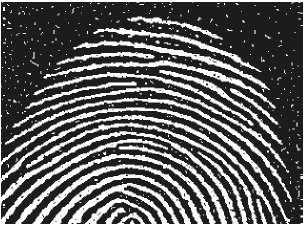

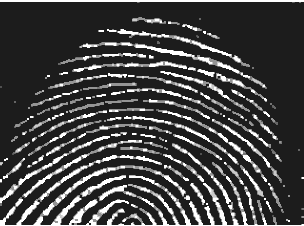

In [10]:
# Q4 Apply the opening operation ( erosion followed by dilation) on the 'FingerPrint.png' 
# to remove the speckle noise
# Hint: Use the cv2.dilate and cv2.erode function and the kernel

# Briefly explain the erosion and dilation operation (not more than 2 sentences each)

# 1 M for filling the gap and 1 M for explanation

imgpath = Your_google_drive_path + 'FingerPrint.png' 
img_fingerprint = cv2.imread(imgpath, 0)

cv2_imshow(img_fingerprint)

kernel = np.ones((3,3), np.uint8)

# img_erosion = ________________________________________
img_erosion = cv2.erode(img_fingerprint,kernel)



kernel = np.ones((2,2), np.uint8)
 
# img_dilation = _________________________________________
img_dilation = cv2.dilate(img_erosion,kernel)



cv2_imshow(img_dilation)




# Explanation of Question 4
### Erosion operation on Image : 
Erosion erodes away the boundaries of the foreground object, and is used to diminish the features of an image. The value of the output pixel is the minimum value of all pixels in the neighborhood and in a binary image, a pixel is set to 0 if any of the neighboring pixels have the value 0.

### Dilation operation on Image :
Dilation operation increases the object area and is used to accentuate features. The value of the output pixel is the maximum value of all pixels in the neighborhood and in a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1.



### Opening is just another name of erosion followed by dilation. It’s effective to remove salt noise.



In [11]:
# Q5. The training samples available for mapping from number of pauses to the MMSE score discussed in the class. 
# Obtain the error function and its derivatives. 
# Apply the gradient descent to obtain the weight parameters of the model. 
# Use random initialization for the weight parameters for gradient descent based solution. 
# Use the following models. 
# (i) y ̂= w0+w1*x1, (ii)  y ̂= w0+w1*x1+w2*(x1^2), (iii)  y ̂=w0+w1*x1+w2*(x1^2)+w3*(x1^3)+w4*(x1^4)

# Obtain the output for the test data and comment on the performance of each of the model
# To obtain the output complete the code at appropriate places

# Briefly explain the gradeint descent process to obtain the weight parameters ( Not more than 3 sentences)
# 1 M for part(i), 1 M for part (ii), 3 M for part (iii) with explanation, and 1 M for explanation

# Training data
x1_train = np.array( [ 2, 4, 6, 8, 10, 12, 14, 16 ], float);
t_train = np.array([ 30, 29, 28, 27, 22, 17, 12, 10], float);

x1_test = np.array( [ 3, 5, 7, 9, 10, 11, 13, 17 ], float);
t_test = np.array([ 29, 28, 28, 25, 22, 19, 14, 8], float);


t_test = t_test.reshape(1, t_test.shape[0])


TrainLen  = x1_train.shape[0]
x1_train_p1 = x1_train.reshape(x1_train.shape[0], 1)
OneMat = np.ones((TrainLen,1), float)
x1_train_p1 = np.concatenate((OneMat, x1_train_p1), axis=1)
x1_train_p1 = np.transpose(x1_train_p1)

t_train = t_train.reshape(1, t_train.shape[0])




# obtain the gradients 

# (i) y ̂= w0+w1*x1
lr = 0.01
w0 = 0.1
w1 = 0.1
for iter in range(1000):
  w = np.array( [ w0, w1], float)
  w = w.reshape(w.shape[0], 1)
  dw0 = (1/TrainLen)*np.sum( (np.matmul(np.transpose(w),x1_train_p1) - t_train))
  x1_only = x1_train_p1[1, :]
  x1_only = x1_only.reshape(1, x1_only.shape[0])
  dw1 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p1) - t_train), x1_only))
  # w0 = ____________________
  w0 = w0 - (lr*dw0)   # calculating w0 parameter


  # w1 = ___________________
  w1 = w1 - (lr*dw1)   # calculating w1 parameter



w = np.array( [ w0, w1], float)
w = w.reshape(w.shape[0], 1)

# Predict_output = np.matmul(np.transpose(w),___________________)
Predict_output = np.matmul(np.transpose(w),x1_train_p1)     # y = (w^T)*x1



print("Part 1 output")
print('----------------------------------')
print("train results")
print("Weight parameters")
print(w)
print('----------------------------------')
print("true values")
print(t_train)
print("predicted values")
print(Predict_output)

# test data preparation
print("test results")

x1_test_p1 = x1_train.reshape(x1_test.shape[0], 1)
OneMat = np.ones((x1_test.shape[0],1), float)
x1_test_p1 = np.concatenate((OneMat, x1_test_p1), axis=1)
x1_test_p1 = np.transpose(x1_test_p1)



print(x1_test_p1.shape)

Predict_test_output = np.matmul(np.transpose(w),x1_test_p1)

print("true values")
print(t_test)
print("predicted values")
print(Predict_test_output)

print('----------------------------------')
print('----------------------------------')



# (ii) y ̂= w0+w1*x1+w2*x1^2

x1_train_p2 = x1_train.reshape(x1_train.shape[0], 1)
#x1_train_p2_sq = np.multiply(x1_train_p2, ___________________)
x1_train_p2_sq = np.multiply(x1_train_p2, x1_train_p2)     # calculating x1^2


OneMat = np.ones((TrainLen,1), float)



x1_train_p2 = np.concatenate((x1_train_p2, x1_train_p2_sq), axis=1)

scaler_p2 = StandardScaler()
# transform data
x1_train_p2 = scaler_p2.fit_transform(x1_train_p2)

x1_train_p2 = np.concatenate((OneMat, x1_train_p2), axis=1)
x1_train_p2 = np.transpose(x1_train_p2)


lr = 0.0001
w0 = 0.1
w1 = 0.1
w2 = 0.1
for iter in range(100000):
  w = np.array( [ w0, w1, w2], float)
  w = w.reshape(w.shape[0], 1)
  dw0 = (1/TrainLen)*np.sum( (np.matmul(np.transpose(w),x1_train_p2) - t_train))
  x1_only = x1_train_p2[1, :]
  x1_only = x1_only.reshape(1, x1_only.shape[0])
  dw1 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p2) - t_train), x1_only))
  x1_sq_only = x1_train_p2[2, :]
  x1_sq_only = x1_sq_only.reshape(1, x1_sq_only.shape[0])
  # dw2 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p2) - t_train), ________________________))
  dw2 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p2) - t_train), x1_sq_only))    # calculating dw2


  w0 = w0 -lr*dw0
  w1 = w1 -lr*dw1
  w2 = w2 -lr*dw2

w = np.array( [ w0, w1, w2], float)
w = w.reshape(w.shape[0], 1)

Predict_output = np.matmul(np.transpose(w),x1_train_p2)
print("Part 2 output")
print('----------------------------------')
print("train results")
print("Weight parameters")
print(w)
print('----------------------------------')
print("true values")
print(t_train)
print("predicted values")
print(Predict_output)


# test data preparation
print("test results")

x1_test_p2 = x1_test.reshape(x1_test.shape[0], 1)
x1_test_p2_sq = np.multiply(x1_test_p2, x1_test_p2)
OneMat = np.ones((x1_test.shape[0],1), float)

x1_test_p2 = np.concatenate((x1_test_p2, x1_test_p2_sq), axis=1)
x1_test_p2 = scaler_p2.transform(x1_test_p2)

x1_test_p2 = np.concatenate((OneMat, x1_test_p2), axis=1)


x1_test_p2 = np.transpose(x1_test_p2)


Predict_test_output = np.matmul(np.transpose(w),x1_test_p2)

print("true values")
print(t_test)
print("predicted values")
print(Predict_test_output)

print('----------------------------------')
print('----------------------------------')

# (iii) y ̂= w0+w1*x1+w2*x1^2+w3*x1^3+w4+x1^4

x1_train_p3 = x1_train.reshape(x1_train.shape[0], 1)
x1_train_p3_sq = np.multiply(x1_train_p3, x1_train_p3)
x1_train_p3_cube = np.multiply(x1_train_p3_sq, x1_train_p3)
# x1_train_p3_4pow = np.multiply(x1_train_p3_cube, ________________)
x1_train_p3_4pow = np.multiply(x1_train_p3_cube, x1_train_p3)      # calculating x1^4


OneMat = np.ones((TrainLen,1), float)



x1_train_p3 = np.concatenate((x1_train_p3, x1_train_p3_sq), axis=1)
x1_train_p3 = np.concatenate((x1_train_p3, x1_train_p3_cube), axis=1)
x1_train_p3 = np.concatenate((x1_train_p3, x1_train_p3_4pow), axis=1)

scaler = StandardScaler()
# transform data
x1_train_p3 = scaler.fit_transform(x1_train_p3)

x1_train_p3 = np.concatenate((OneMat, x1_train_p3), axis=1)

x1_train_p3 = np.transpose(x1_train_p3)


lr = 0.0001
w0 = 0.1
w1 = 0.1
w2 = 0.1
w3 = 0.1
w4 = 0.1

for iter in range(100000):
  w = np.array( [ w0, w1, w2, w3, w4], float)
  w = w.reshape(w.shape[0], 1)
  dw0 = (1/TrainLen)*np.sum( (np.matmul(np.transpose(w),x1_train_p3) - t_train))
  x1_only = x1_train_p3[1, :]
  x1_only = x1_only.reshape(1, x1_only.shape[0])
  dw1 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p3) - t_train), x1_only))
  x1_sq_only = x1_train_p3[2, :]
  x1_sq_only = x1_sq_only.reshape(1, x1_sq_only.shape[0])
  dw2 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p3) - t_train), x1_sq_only))

  x1_cub_only = x1_train_p3[3, :]
  x1_cub_only = x1_cub_only.reshape(1, x1_cub_only.shape[0])
  # dw3 = _______________________________________________________________________________
  dw3 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p3) - t_train), x1_cub_only))   # calculating dw3



  x1_4pow_only = x1_train_p3[4, :]
  x1_4pow_only = x1_4pow_only.reshape(1, x1_4pow_only.shape[0])
  # dw4 = ______________________________________________________________________________
  dw4 = (1/TrainLen)*np.sum(np.multiply( (np.matmul(np.transpose(w),x1_train_p3) - t_train), x1_4pow_only))   # calculating dw4



  w0 = w0 -lr*dw0
  w1 = w1 -lr*dw1
  w2 = w2 -lr*dw2
  w3 = w3 -lr*dw3
  w4 = w4 -lr*dw4

w = np.array( [ w0, w1, w2, w3, w4], float)
w = w.reshape(w.shape[0], 1)

Predict_output = np.matmul(np.transpose(w),x1_train_p3)

print("Part 3 output")
print('----------------------------------')
print("train results")
print("Weight parameters")
print(w)
print('----------------------------------')
print("true values")
print(t_train)
print("predicted values")
print(Predict_output)

# test data preparation
print("test results")

x1_test_p3 = x1_test.reshape(x1_test.shape[0], 1)
x1_test_p3_sq = np.multiply(x1_test_p3, x1_test_p3)
x1_test_p3_cube = np.multiply(x1_test_p3_sq, x1_test_p3)
x1_test_p3_4pow = np.multiply(x1_test_p3_cube, x1_test_p3)




x1_test_p3 = np.concatenate((x1_test_p3, x1_test_p3_sq), axis=1)
x1_test_p3 = np.concatenate((x1_test_p3, x1_test_p3_cube), axis=1)
x1_test_p3 = np.concatenate((x1_test_p3, x1_test_p3_4pow), axis=1)

# transform data
# x1_test_p3 = scaler.transform(________________________)
x1_test_p3 = scaler.transform(x1_test_p3)


OneMat = np.ones((x1_test.shape[0],1), float)
x1_test_p3 = np.concatenate((OneMat, x1_test_p3), axis=1)

x1_test_p3 = np.transpose(x1_test_p3)






Predict_test_output = np.matmul(np.transpose(w),x1_test_p3)

print("true values")
print(t_test)
print("predicted values")
print(Predict_test_output)

print('----------------------------------')
print('----------------------------------')



Part 1 output
----------------------------------
train results
Weight parameters
[[31.34113424]
 [-1.15673242]]
----------------------------------
true values
[[30. 29. 28. 27. 22. 17. 12. 10.]]
predicted values
[[29.02766941 26.71420457 24.40073974 22.08727491 19.77381008 17.46034525
  15.14688042 12.83341558]]
test results
(2, 8)
true values
[[29. 28. 28. 25. 22. 19. 14.  8.]]
predicted values
[[29.02766941 26.71420457 24.40073974 22.08727491 19.77381008 17.46034525
  15.14688042 12.83341558]]
----------------------------------
----------------------------------
Part 2 output
----------------------------------
train results
Weight parameters
[[21.87401191]
 [-2.88204609]
 [-4.46852973]]
----------------------------------
true values
[[30. 29. 28. 27. 22. 17. 12. 10.]]
predicted values
[[31.45893761 29.56651436 27.25102764 24.51247744 21.35086376 17.76618661
  13.75844599  9.32764189]]
test results
true values
[[29. 28. 28. 25. 22. 19. 14.  8.]]
predicted values
[[30.56560892 28.46165

# Comment on the performance of each of the model
Performance of model 3 > Performance of model 2 > Performance of model 1

Complexity of  model 3 > Complexity of  model 2 > Complexity of  model 1

As the complexity of the model increases, performance of the model increases, and the difference between the predicted and actual value decreases.

# Explanation of Question 5
Start with arbitrarily chosen weight vector w.
Compute the gradient vector of w for the current weight vector ( dE(w)/dw ).
Adjust the weight vector w in the direction of steepest descent.

w_update = w_before − α(dE(w)/dw_before)

α is the learning rate.





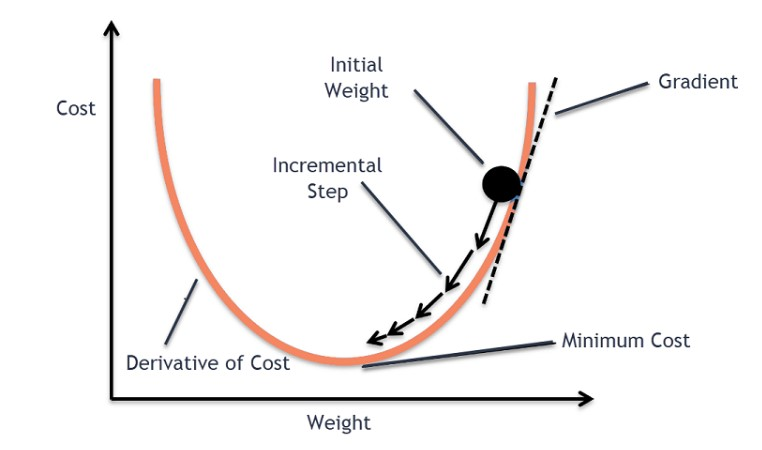



In [12]:
# Q6 Classification of X-ray scans of a chest as that of a chest that is normal or has pneumonia using GLCM features
#  Briefly explain the advantage of logistic regression over linear regression for classification ( Not more than 2 senntences)
# 3 M for filling the space and 1 M for explanation



vector = 2 * 4 * 5 # distances * orientations * number of features

############################ FUNCTIONS ############################
def extract_features(img):
    # create glcm of an image (distance=[1,2], angles=[0,45,90,135])
    glcm = greycomatrix(img, [1,2], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)

    # energy = _______________________________
    energy = greycoprops(glcm,'energy')


    homogeneity = greycoprops(glcm, 'homogeneity')
    contrast = greycoprops(glcm, 'contrast')
    dissimilarity = greycoprops(glcm, 'dissimilarity')

    # correlation = _____________________________________
    correlation = greycoprops(glcm,'correlation')

    
    return np.array([energy, homogeneity, contrast, dissimilarity, correlation])

############################ PROGRAM ############################
# store image folder into variable


imgpath = Your_google_drive_path +'chest_xray_dataset/chest_xray_dataset/train/NORMAL/*.jpeg' 
path_normal_train = glob.glob(imgpath)

imgpath = Your_google_drive_path + 'chest_xray_dataset/chest_xray_dataset/train/PNEUMONIA/*.jpeg' 
path_pneumonia_train = glob.glob(imgpath)

imgpath = Your_google_drive_path + 'chest_xray_dataset/chest_xray_dataset/test/NORMAL/*.jpeg' 
path_normal_test = glob.glob(imgpath)

imgpath = Your_google_drive_path +'chest_xray_dataset/chest_xray_dataset/test/PNEUMONIA/*.jpeg' 
path_pneumonia_test = glob.glob(imgpath)

# empty list to hold train feature vectors and labels
train_features = []
train_labels = []


# Extract haralick features of train images into array
print('[STATUS] Extracting GLCM features of normal chests from train data...')
for img in tqdm(path_normal_train, ncols=100):
    n = np.array(cv2.imread(img, cv2.IMREAD_GRAYSCALE)) # convert image to grayscale
    img_class = 0 # normal
    features = extract_features(n)
    train_features.append(features)
    train_labels.append(img_class)



print('[STATUS] Extracting GLCM features of pneumonia chests from train data...')
for img in tqdm(path_pneumonia_train, ncols=100):
    n = np.array(cv2.imread(img, cv2.IMREAD_GRAYSCALE)) # convert image to grayscale
    img_class = 1 # pneumonia
    features = extract_features(n)
    train_features.append(features)
    train_labels.append(img_class)

total_train = len(train_labels) # total train images
train_features = np.array(train_features).reshape(total_train, vector)

# empty list to hold test feature vectors and labels
test_features = []
test_labels = []


# Extract haralick features of test images into array
print('[STATUS] Extracting GLCM features of normal chests from test data...')
for img in tqdm(path_normal_test, ncols=100):
    n = np.array(cv2.imread(img, cv2.IMREAD_GRAYSCALE)) # convert image to grayscale
    img_class = 0 # normal
    features = extract_features(n)
    test_features.append(features)
    test_labels.append(img_class)


print('[STATUS] Extracting GLCM features of pneumonia chests from test data...')
for img in tqdm(path_pneumonia_test, ncols=100):
    n = np.array(cv2.imread(img, cv2.IMREAD_GRAYSCALE)) # convert image to grayscale
    img_class = 1 # pneumonia
    features = extract_features(n)
    test_features.append(features)
    test_labels.append(img_class)

total_test = len(test_features) # total test images
test_features = np.array(test_features).reshape(total_test, vector)


 # train the model
print('[STATUS] Training...')

# all parameters not specified are set to their defaults
model = LogisticRegression(solver='lbfgs', max_iter=1000)
print(train_features.size)
print(len(test_labels))


# model.fit(_____________________, _________________________________)
model.fit(train_features,train_labels)



# predict the response for test features
# pred_labels = model.predict(_________________________)
pred_labels = model.predict(test_features)



pred_labels = pred_labels.reshape(pred_labels.shape[0], 1)
test_labels = np.array(test_labels, float)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

diff = np.sum(pred_labels - test_labels)
print(diff)

print((pred_labels.shape))
# score = model.score(test_features, ______________________________)
score = model.score(test_features,test_labels)



print(score)




[STATUS] Extracting GLCM features of normal chests from train data...


100%|█████████████████████████████████████████████████████████████| 200/200 [00:30<00:00,  6.57it/s]


[STATUS] Extracting GLCM features of pneumonia chests from train data...


100%|█████████████████████████████████████████████████████████████| 200/200 [02:45<00:00,  1.21it/s]


[STATUS] Extracting GLCM features of normal chests from test data...


100%|███████████████████████████████████████████████████████████████| 50/50 [00:49<00:00,  1.01it/s]


[STATUS] Extracting GLCM features of pneumonia chests from test data...


100%|███████████████████████████████████████████████████████████████| 50/50 [00:39<00:00,  1.28it/s]

[STATUS] Training...
16000
100
47.0
(100, 1)
0.53


# Explanation of Question 6
**Linear regression** is not suitable for classification problems because it is unbounded and the predicted value is continuous, and not probabilistic, also it models the relationship between a dependent variable and one or more independent variables, whereas **logistic regression**, predicts the probability of an outcome that can only have two values at the output either 0 or 1, in **logistic regression**, the predicted output is a discrete variable.


Not only this but **linear regression** is also highly sensitive to imbalanced 
data as it tries to fit the line by minimizing the error(distance between the line and the actual value). As a result, it can be inferred that **Linear regression** is better off with regression problems and is not suitable for classification problems, which brings **logistic regression** into the picture.
